<a href="https://colab.research.google.com/github/nhatvnguyen/computational-physics-python-projects/blob/main/HW6B_Nguyen_Chi_Squared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nhat Nguyen
### Computational Physics, PHYS 421
#### HW6, due: 11/17, 10 am

3) Finish the exercise started in class (model fitting notebook).

(a) Calculate square residuals (scaled chi squared) for the student g values.

(b) Plot the scaled chi squared as a function of your model parameter (best-fit g).

(c) Find the best fit parameter by minimizing chi squared. Compare this to the mean of the sample.

$\chi^2 = \sum \frac{\left(y_i - \lambda(x_i; \, \theta)\right)^2}{\sigma_i^2}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# import student g values

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

g_data = ascii.read('/content/drive/MyDrive/Colab Notebooks/PHYS421_Computational Physics/HW/student_g_values.txt')
g_array = np.array([g_data[c] for c in g_data.columns])
g_only = g_array[3:,:]
g = g_only.flatten()
g = np.array(g, float)
print(g)

[ 9.63  9.72  9.66  9.86  9.67  9.72  9.85  9.79  9.73  9.72  9.72  9.75
  9.75  9.75  9.71  9.73  9.68  9.75  9.71  9.64  9.74  9.73  9.77  9.78
  9.39  9.78  9.75  9.68  9.44  9.71  9.82  9.7   9.72  9.74  9.82  9.18
  9.81  9.7   9.9   9.78  9.63  9.73  9.85  9.89  9.61  9.57  9.83  9.7
  9.72  9.6   9.65  9.68  9.37  9.6   9.75  9.76  9.7   9.63  9.69  9.77
  9.72  9.85  9.72  9.22  9.56  9.72  9.84  9.67  9.69  9.78  9.73  9.7
  9.6   9.62  9.69  9.7   9.74  9.66  9.67  9.73  9.76  9.78  9.24  9.84
  9.63  9.75  9.72  9.71  9.82  9.73  9.77  9.66  9.77  9.7   9.19  9.73
  9.77  9.98  9.64  9.79  9.67  9.74  9.73  9.77  9.74  9.93  9.74  9.82
  9.72  9.73  9.71  9.71  9.74  9.74  9.63  9.73  9.69  9.73  9.77  9.8
  9.75  9.61  9.7   9.57  9.79  9.74  9.53  9.76  8.57  9.69  9.76  9.79
  9.72  9.73  9.75  9.69  9.37  9.63  9.74  9.75  9.74  9.75  9.69  9.71
  9.74  9.77  9.62  9.36  9.73  9.76  9.69  9.7   9.79  9.7   9.73  9.73
  9.68  9.58  9.77 11.8   9.75  9.92  9.82  9.71  9.64

In [ ]:
# function to calculate chi squared for a given model parameter
# how far apart our data {yi}
# predictions of what the values should be, λ(xi; θ)
# certain positions in x {xi}
# certain model parameters θ.
# uncertainty for each data point, σi.

def chi_squared(y, theta, sigma):
  """
  This function performs chi_square calculations to obtain chi_squared values from each theta points

  Args
  y: numpy array, how far apart our data
  theta: numpy array, certain model parameters
  sigma: float, uncertainty of the data points, this is the same for homoscedastic data

  Return
  chi_squared: numpy array, values of chi_squared
  """

  chi_squared = np.empty(len(theta)) # ask Dr. Syphers how to do this without append
  # chi_squared = np.ones(len(chi_points))
  for i in range(0, len(theta)):
    chi_points = ((g-theta[i])**2)/(sigma**2) # filling zeros array with calculations

    chi_squared[i] = np.sum(chi_points)  # append the sum of chi_points array into chi_squared
    i += 1

  return chi_squared

In [ ]:
chi_points = np.zeros(len(theta))
# chi_squared = np.empty(0)
chi_sqr = np.zeros(len(theta))
for j in range(0,len(theta)):
  for i in range(0,len(theta)):
    chi_points[i] = ((g[i]-theta[j])**2)/(sigma**2) # filling zeros array with calculations
    i += 1

  chi_sqr[j] = np.sum(chi_points)  # sum of chi_points array into chi_squared
  j += 1

Minimum value of chi^2: 462.05123 
Best fit Theta: 9.75000
Mean of the Data: 9.70765
--> The theta value from the fit test was very close to the mean


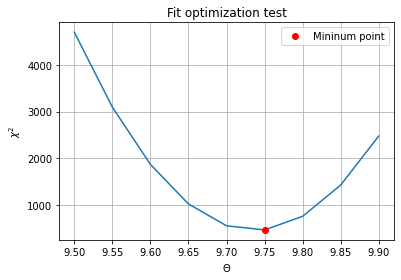

In [ ]:
from astropy.units.format.latex import Latex
std_data = np.std(g)                                         # find standard deviation
mean_data = np.mean(g)                                       # find mean
lower_outlier = mean_data - std_data                         # find lower bound
upper_outlier = mean_data + std_data                         # find upper bound
sigma = std_data/(np.sqrt(len(g)))                           # same uncertainty on the mean for the Homoscedastic data set
# theta = np.linspace(lower_outlier, upper_outlier,num=len(g)) # set theta parameter as a linear increase within the bounds
theta = np.arange(9.5,9.95,0.05)
# chi_sqr = chi_squared(g, theta, sigma)                       # find chi_sqr from the function defined

chi_points = np.zeros(len(theta))
# chi_squared = np.empty(0)
chi_sqr = np.zeros(len(theta))
for j in range(0,len(theta)):
  for i in range(0,len(theta)):
    chi_points[i] = ((g[i]-theta[j])**2)/(sigma**2) # filling zeros array with calculations
    i += 1

  chi_sqr[j] = np.sum(chi_points)  # sum of chi_points array into chi_squared
  j += 1


plt.plot(theta, chi_sqr)
plt.plot(theta[np.argmin(chi_sqr)],np.amin(chi_sqr), 'ro', label="Mininum point")
plt.legend()
plt.grid()
plt.title("Fit optimization test")
plt.xlabel("$\Theta$")
plt.ylabel("$\chi^2$")

index = np.argmin(chi_sqr)
print("Minimum value of chi^2: {:.5f} ".format(np.amin(chi_sqr)))
print("Best fit Theta: {:.5f}".format(theta[index]))
print("Mean of the Data: {:.5f}".format(mean_data))
print("--> The theta value from the fit test was very close to the mean")



Minimum value of chi^2: 113061.74351 
Best fit Theta: 9.70000
Mean of the Data: 9.70765
--> The theta value from the fit test was very close to the mean


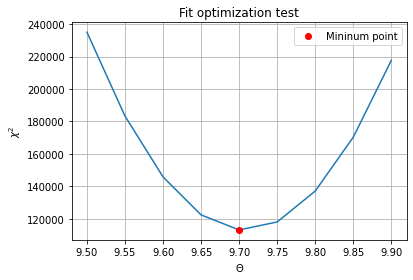

In [ ]:
from astropy.units.format.latex import Latex
std_data = np.std(g)                                         # find standard deviation
mean_data = np.mean(g)                                       # find mean
lower_outlier = mean_data - std_data                         # find lower bound
upper_outlier = mean_data + std_data                         # find upper bound
sigma = std_data/(np.sqrt(len(g)))                           # same uncertainty on the mean for the Homoscedastic data set
# theta = np.linspace(lower_outlier, upper_outlier,num=len(g)) # set theta parameter as a linear increase within the bounds
theta = np.arange(9.5,9.95,0.05)
chi_sqr = chi_squared(g, theta, sigma)                       # find chi_sqr from the function defined

# chi_points = np.zeros(len(theta))
# chi_squared = np.empty(0)
# chi_sqr = np.zeros(len(theta))
# for j in range(0,len(theta)):
#   for i in range(0,len(theta)):
#     chi_points[i] = ((g[i]-theta[j])**2)/(sigma**2) # filling zeros array with calculations
#     i += 1

#   chi_sqr[j] = np.sum(chi_points)  # sum of chi_points array into chi_squared
#   j += 1


plt.plot(theta, chi_sqr)
plt.plot(theta[np.argmin(chi_sqr)],np.amin(chi_sqr), 'ro', label="Mininum point")
plt.legend()
plt.grid()
plt.title("Fit optimization test")
plt.xlabel("$\Theta$")
plt.ylabel("$\chi^2$")

index = np.argmin(chi_sqr)
print("Minimum value of chi^2: {:.5f} ".format(np.amin(chi_sqr)))
print("Best fit Theta: {:.5f}".format(theta[index]))
print("Mean of the Data: {:.5f}".format(mean_data))
print("--> The theta value from the fit test was very close to the mean")



In [ ]:
print(chi_points)
print(chi_sqr)

[614.66303999 273.18357333 485.65968592  13.49054683 446.0312046
 273.18357333  21.07897942 102.02226041 243.67300214]
[4698.92609308 3092.70786101 1865.91125857 1018.53628574  550.58294254
  462.05122896  752.94114501 1423.25269067 2472.98586596]
